In [65]:
# importing libraries

# working with datasets and calculations
import pandas as pd
import numpy as np


# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# working with paths
import pathlib

# working with maps
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

In [66]:
# get file(s) from "data" directory

def get_files(directory_name):
    # look for .xlsx files in directory [directory_name]
    # set generator to variable
    file_path_gen = pathlib.Path(directory_name).glob('**/*.xlsx')

    # get absolute paths
    return [file_path.absolute() for file_path in file_path_gen][0]

dataset_file_path = get_files('data')
print(dataset_file_path)

c:\Users\n.rudakov\Desktop\code\ML\UNI_RATING\data\IPEDS_data.xlsx


In [67]:
# load Excel sheet to Pandas DataFrame
data = pd.read_excel(dataset_file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 145 entries, ID number to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(116), int64(2), object(27)
memory usage: 1.7+ MB


In [68]:
# take a first look on data
data.head(7)

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN
5,100751,The University of Alabama,2013,35487-0166,Doctor's degree - research/scholarship and pro...,Tuscaloosa County,-87.545766,33.214400,Not applicable,Implied no,...,20.0,18.0,4.0,3.0,50.0,42.0,41.0,8.0,19469.0,NaN
6,100812,Athens State University,2013,35611,Bachelor's degree,Limestone County,-86.965140,34.805625,Not applicable,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,854.0,NaN


### Data Cleansing & Formatting

#### Step 1. Duplicated data


In [69]:
print(f'Dataset has {data.duplicated().sum()} duplicated values')

Dataset has 0 duplicated values


#### Step 2. Missing values

Text(0, 0.5, '% of NaN values')

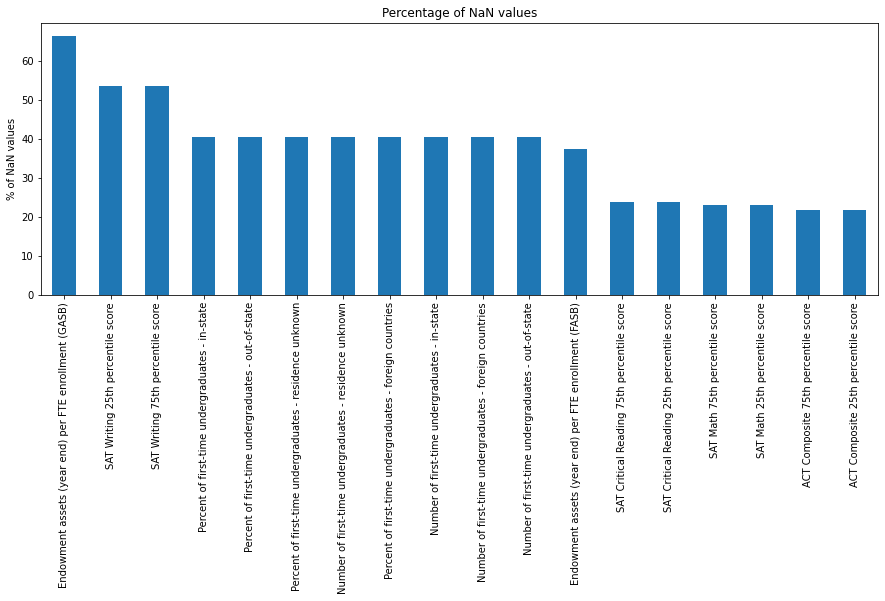

In [70]:
missing_values_percentage = data.isna().sum() / len(data) * 100

ax = missing_values_percentage[missing_values_percentage>20].sort_values(ascending=False).plot.bar(title='Percentage of NaN values',figsize=(15,5))
ax.set_ylabel('% of NaN values')

In [71]:
columns_to_be_removed = data.columns[missing_values_percentage>20].tolist()

data_new = data.copy()
data_new.drop(columns_to_be_removed, axis=1, inplace=True)

#### Step 3. Formatting

In [72]:
# change column names for better use

def change_column_names(column, characters=[',',':','-','/', '(', ')']):
    # loop through chars to be replaced for ' '
    for char in characters:
        column = column.lower().replace(char, ' ')

    # remove extra spaces and replace extra chars
    column = " ".join(column.split()).replace("'", '').replace(' ', '_')

    return column


column_names_modified = list(map(change_column_names, data_new.columns))

data_new.columns = column_names_modified
data_new.rename({'id_number':'id'}, axis=1, inplace=True)

data_new.columns

Index(['id', 'name', 'year', 'zip_code', 'highest_degree_offered',
       'county_name', 'longitude_location_of_institution',
       'latitude_location_of_institution', 'religious_affiliation',
       'offers_less_than_one_year_certificate',
       ...
       'percent_of_freshmen_receiving_any_financial_aid',
       'percent_of_freshmen_receiving_federal_state_local_or_institutional_grant_aid',
       'percent_of_freshmen_receiving_federal_grant_aid',
       'percent_of_freshmen_receiving_pell_grants',
       'percent_of_freshmen_receiving_other_federal_grant_aid',
       'percent_of_freshmen_receiving_state_local_grant_aid',
       'percent_of_freshmen_receiving_institutional_grant_aid',
       'percent_of_freshmen_receiving_student_loan_aid',
       'percent_of_freshmen_receiving_federal_student_loans',
       'percent_of_freshmen_receiving_other_loan_aid'],
      dtype='object', length=127)

In [73]:
interesting_columns = ['name', 'highest_degree_offered', 'applicants_total',
       'admissions_total', 'enrolled_total', 'estimated_enrollment_total',
       'tuition_and_fees_2013_14',
       'total_price_for_in_state_students_living_on_campus_2013_14',
       'total_price_for_out_of_state_students_living_on_campus_2013_14',
       'state_abbreviation', 'control_of_institution', 'total_enrollment',
       'full_time_enrollment', 'part_time_enrollment',
       'undergraduate_enrollment', 'graduate_enrollment',
       'percent_of_freshmen_receiving_any_financial_aid'
]

In [74]:
unis_data = data_new[interesting_columns]    
unis_data.head(5)

,name,highest_degree_offered,applicants_total,admissions_total,enrolled_total,estimated_enrollment_total,tuition_and_fees_2013_14,total_price_for_in_state_students_living_on_campus_2013_14,total_price_for_out_of_state_students_living_on_campus_2013_14,state_abbreviation,control_of_institution,total_enrollment,full_time_enrollment,part_time_enrollment,undergraduate_enrollment,graduate_enrollment,percent_of_freshmen_receiving_any_financial_aid
0,Alabama A & M University,Doctor's degree - research/scholarship,6142.0,5521.0,1104.0,5024.0,7182.0,21849.0,27441.0,Alabama,Public,5020.0,4439.0,581.0,4051.0,969.0,97.0
1,University of Alabama at Birmingham,Doctor's degree - research/scholarship and pro...,5689.0,4934.0,1773.0,18568.0,7206.0,22495.0,31687.0,Alabama,Public,18568.0,11961.0,6607.0,11502.0,7066.0,90.0
2,Amridge University,Doctor's degree - research/scholarship and pro...,NaN,NaN,NaN,626.0,6870.0,NaN,NaN,Alabama,Private not-for-profit,631.0,323.0,308.0,322.0,309.0,100.0
3,University of Alabama in Huntsville,Doctor's degree - research/scholarship and pro...,2054.0,1656.0,651.0,7376.0,9192.0,23466.0,35780.0,Alabama,Public,7376.0,4802.0,2574.0,5696.0,1680.0,87.0
4,Alabama State University,Doctor's degree - research/scholarship and pro...,10245.0,5251.0,1479.0,6076.0,8720.0,18286.0,25222.0,Alabama,Public,6075.0,5182.0,893.0,5356.0,719.0,93.0


#### Step 4. Invalid Data

In [75]:
unis_data[unis_data['total_enrollment'].isna()]\
                    [['name', 'applicants_total', 'admissions_total', 'enrolled_total', 'total_enrollment']]

,name,applicants_total,admissions_total,enrolled_total,total_enrollment
257,University of North Georgia,NaN,NaN,NaN,NaN
1308,Texas A & M University-Galveston,NaN,NaN,NaN,NaN


In [76]:
unis_data.drop(index=[257, 1308], inplace=True)

In [77]:
less_than_zero_mask = unis_data.select_dtypes(include=['int64', 'float64']) < 0
num_cols_val_less_zero = unis_data[less_than_zero_mask].any().sum()

print(f'Dataset has {num_cols_val_less_zero} columns with values less than zero.')

Dataset has 0 columns with values less than zero.


In [78]:
unis_data.describe()

,applicants_total,admissions_total,enrolled_total,estimated_enrollment_total,tuition_and_fees_2013_14,total_price_for_in_state_students_living_on_campus_2013_14,total_price_for_out_of_state_students_living_on_campus_2013_14,total_enrollment,full_time_enrollment,part_time_enrollment,undergraduate_enrollment,graduate_enrollment,percent_of_freshmen_receiving_any_financial_aid
count,1377.000000,1377.000000,1377.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1492.000000
mean,6391.193174,3554.880174,1043.046478,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5371.494125,1698.620104,5532.885117,1537.229112,90.672252
std,8787.469171,4309.457606,1285.165519,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7474.494963,2922.064160,7242.649546,2765.197979,11.963692
min,0.000000,0.000000,0.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,1488.000000,950.000000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1199.000000,167.000000,1328.000000,46.750000,87.000000
50%,3350.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2328.000000,671.000000,2487.500000,471.000000,95.000000
75%,7016.000000,4203.000000,1246.000000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6080.750000,2062.500000,6394.000000,1737.000000,99.000000
max,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,40985.000000,51333.000000,29874.000000,100.000000


In [79]:
zero_values_count = unis_data[unis_data==0].count().sum()
print(f'Dataset contains {zero_values_count} zero values.')

Dataset contains 303 zero values.


In [80]:
unis_data.replace(0, np.nan, inplace=True)

In [81]:
unis_data[['name', 'applicants_total']].sort_values(by='applicants_total').head(7)

,name,applicants_total
1343,Goddard College,4.0
331,Shimer College,28.0
1500,Trine University-Regional/Non-Traditional Camp...,33.0
1479,Brandman University,34.0
1046,Marylhurst University,36.0
1476,Antioch University-Seattle,42.0
1354,Sterling College,49.0


In [82]:
# from their website
unis_data.loc[unis_data['name']=='Goddard College', 'applicants_total'] = 22

### Explanatory Data Analysis

To start off, let's observe the dataset we have and look through instances and features it has. 

In [83]:
from IPython.display import display
# display ALL columns in dataset
with pd.option_context('display.max_columns',None):
    # describe basic statistics
    display(unis_data.describe())

print('''Table 1. Statistical description of numerical features of dataset''')
print('''Observations. Dataset records can differ a lot from each other as applicants|admissions|enrolled totals min & max values varies a lot.
Subconsequently, we can see that some universities received over 72600 applications versus 0 applications received 
by another group of unis.''')

,applicants_total,admissions_total,enrolled_total,estimated_enrollment_total,tuition_and_fees_2013_14,total_price_for_in_state_students_living_on_campus_2013_14,total_price_for_out_of_state_students_living_on_campus_2013_14,total_enrollment,full_time_enrollment,part_time_enrollment,undergraduate_enrollment,graduate_enrollment,percent_of_freshmen_receiving_any_financial_aid
count,1376.000000,1376.000000,1376.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1530.000000,1507.000000,1522.000000,1269.000000,1492.000000
mean,6395.851017,3557.463663,1043.804506,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5378.515686,1726.798938,5569.237845,1855.819543,90.672252
std,8788.963437,4309.957540,1285.324785,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7476.855128,2937.942843,7252.465825,2939.482145,11.963692
min,22.000000,4.000000,2.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,1.000000,2.000000,11.000000,1.000000,18.000000
25%,1491.750000,951.500000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1200.750000,186.000000,1347.000000,216.000000,87.000000
50%,3360.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2331.500000,695.000000,2516.500000,728.000000,95.000000
75%,7020.500000,4207.500000,1246.500000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6094.250000,2112.500000,6443.000000,2180.000000,99.000000
max,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,40985.000000,51333.000000,29874.000000,100.000000


Table 1. Statistical description of numerical features of dataset
Observations. Dataset records can differ a lot from each other as applicants|admissions|enrolled totals min & max values varies a lot.
Subconsequently, we can see that some universities received over 72600 applications versus 0 applications received 
by another group of unis.


Values in dataset fluctuates sharply, therefore it is worth consideration
Let's first analyze the distribution of key statistics (first 3 columns, totals)

Chart 1. As we can see, the majority of universities received less than 5000 applications in 2013.       
However, some universities received a much higher number of applications, as many as 30000 applications in the same year.
We also can see that numbers of admissions and enrollements are much lower that the one of applications, which is a common thing
as places in courses at different universities are limited.


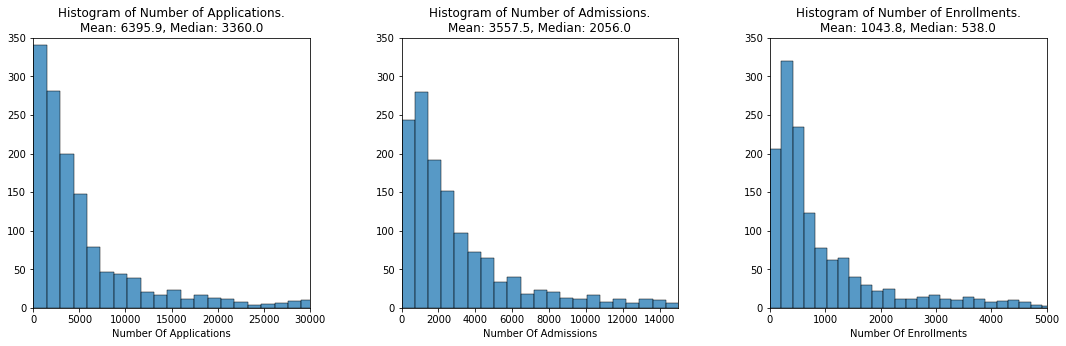

In [84]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.histplot(unis_data.applicants_total, bins=50)
plt.title(f'''Histogram of Number of Applications.
Mean: {unis_data.applicants_total.mean():.1f}, Median: {unis_data.applicants_total.median():.1f}''')
plt.axis([0,30000,0,350])
plt.xlabel('Number Of Applications')
plt.ylabel('')

plt.subplot(1, 3, 2)
sns.histplot(unis_data.admissions_total, bins=50)
plt.title(f'''Histogram of Number of Admissions.
Mean: {unis_data.admissions_total.mean():.1f}, Median: {unis_data.admissions_total.median():.1f}''')
plt.axis([0,15000,0,350])
plt.xlabel('Number Of Admissions')
plt.ylabel('')

plt.subplot(1, 3, 3)
sns.histplot(unis_data.enrolled_total, bins=50)
plt.title(f'''Histogram of Number of Enrollments.
Mean: {unis_data.enrolled_total.mean():.1f}, Median: {unis_data.enrolled_total.median():.1f}''')
plt.axis([0,5000,0,350])
plt.xlabel('Number Of Enrollments')
plt.ylabel('')

plt.tight_layout(pad=5)

print('''Chart 1. As we can see, the majority of universities received less than 5000 applications in 2013.       
However, some universities received a much higher number of applications, as many as 30000 applications in the same year.
We also can see that numbers of admissions and enrollements are much lower that the one of applications, which is a common thing
as places in courses at different universities are limited.''')

Let's take a look on top 15 universities by number of application and enrollment rate
For this, some additional columns are needed

In [85]:
unis_data['acceptance_rate'] = unis_data['admissions_total'] / unis_data['applicants_total']
unis_data['enrollment_rate'] = unis_data['enrolled_total'] / unis_data['admissions_total']

Chart 2. Only 1 university from top 15 (by Number Of Applications) is in top 15 (by Number Of Enrollment).
Reasons could be, for example, low acceptance rate or great number of students' with no real interest to actually enrol


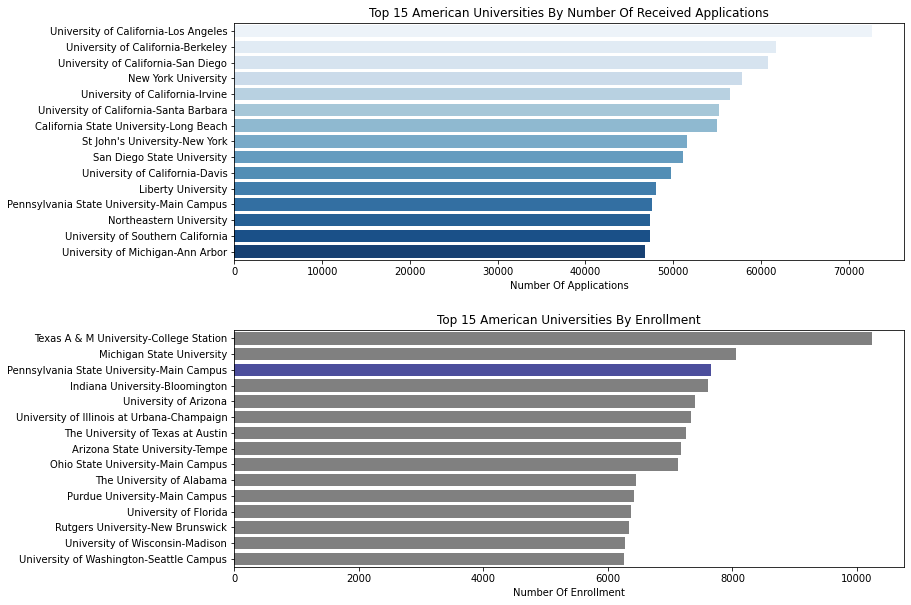

In [105]:
unis_top_applications_15 = unis_data[['name', 'applicants_total']].sort_values(by='applicants_total', ascending=False).head(15)
unis_top_enrollment_15 = unis_data[['name', 'enrolled_total']].sort_values(by='enrolled_total', ascending=False).head(15)

colors_enrollment = ['#3F42A9' if name in list(unis_top_applications_15.name) else 'grey' for name in unis_top_enrollment_15.name]

fig = plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='applicants_total', y='name', data=unis_top_applications_15, palette='Blues')
plt.title('Top 15 American Universities By Number Of Received Applications')
plt.xlabel('Number Of Applications')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.barplot(x='enrolled_total', y='name', data=unis_top_enrollment_15, palette=colors_enrollment)
plt.title('Top 15 American Universities By Enrollment')
plt.xlabel('Number Of Enrollment')
plt.ylabel('')

print("""Chart 2. Only 1 university from top 15 (by Number Of Applications) is in top 15 (by Number Of Enrollment).
Reasons could be, for example, low acceptance rate or great number of students' with no real interest to actually enrol""")

plt.subplots_adjust(hspace=0.3)

Graph 3. It shows that only 9th of all applicants actually got in one of the top 15 unis. 
Unis accept every 3rd applicant, and from those only 27% actually decide to enrol.


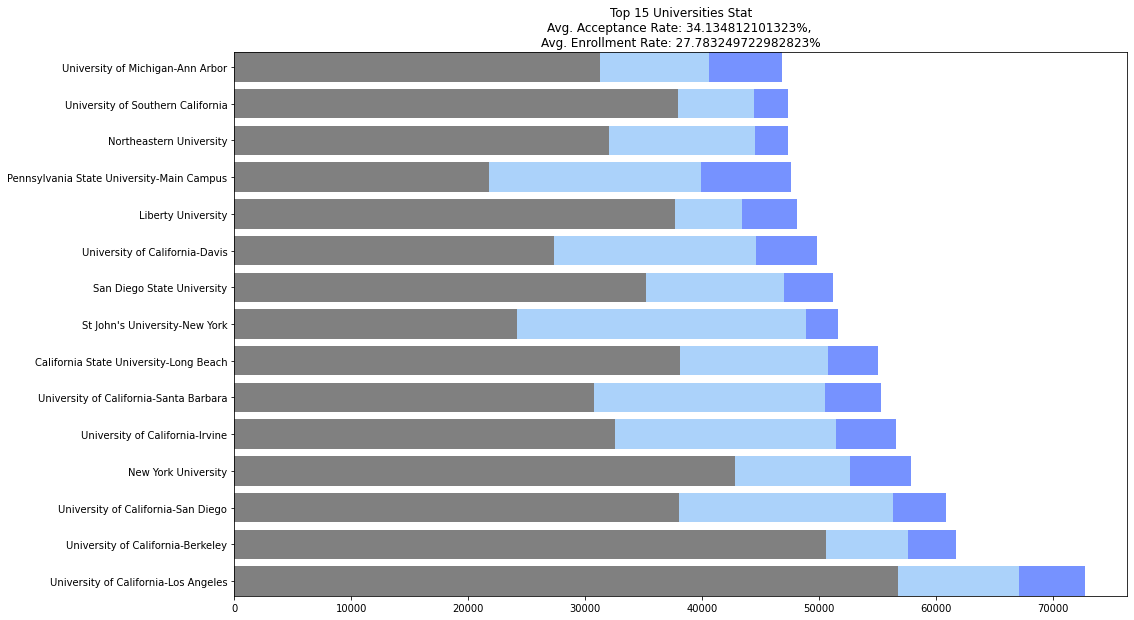

In [87]:
# extract records that are in top 15
unis_top_applications_15 = unis_data[unis_data['name'].isin(unis_top_applications_15.name)]

# extract only useful features for this part of an analysis
unis_top_applications_15 = unis_top_applications_15[['name', 'applicants_total', 'admissions_total', 'acceptance_rate', 
                                                    'enrolled_total', 'enrollment_rate']]\
                            .sort_values(by='applicants_total', ascending=False).reset_index().drop('index', axis=1)

# get names of unis from top 15 in sorted order
top_15_unis_name = list(unis_top_applications_15.name)

# copy dataframe
df = unis_top_applications_15.copy()

# creating some auxiliary columns  
df.c1 = df.applicants_total - df.admissions_total
df.c2 = df.admissions_total - df.enrolled_total
df.c3 = df.c1 + df.c2

# plot chart
fig = plt.figure(figsize=(16,10))

plt.barh(df.name, df.c1, color='grey', tick_label=top_15_unis_name)
plt.barh(df.name, df.c2, left=df.c1, color='#ABD2FA', tick_label=top_15_unis_name)
plt.barh(df.name, df.enrolled_total, left=df.c3, color='#7692FF', tick_label=top_15_unis_name)

plt.margins(y=0)

plt.title(f'''Top 15 Universities Stat
Avg. Acceptance Rate: {np.mean(unis_top_applications_15.acceptance_rate)*100}%, 
Avg. Enrollment Rate: {np.mean(unis_top_applications_15.enrollment_rate)*100}%''')

print('''Chart 3. It shows that only 9th of all applicants actually got in one of the top 15 unis. 
Unis accept every 3rd applicant, and from those only 27% actually decide to enrol.''')

Now let's make general analysis upon all records and try to find some correlations

Will start off with their location, so that we could enhance our further assumptions regarding preferences of applicants

Graph 4. It clearly shows that unis of such states as California, Texas, Illinois, Florida, etc. get the most applications.


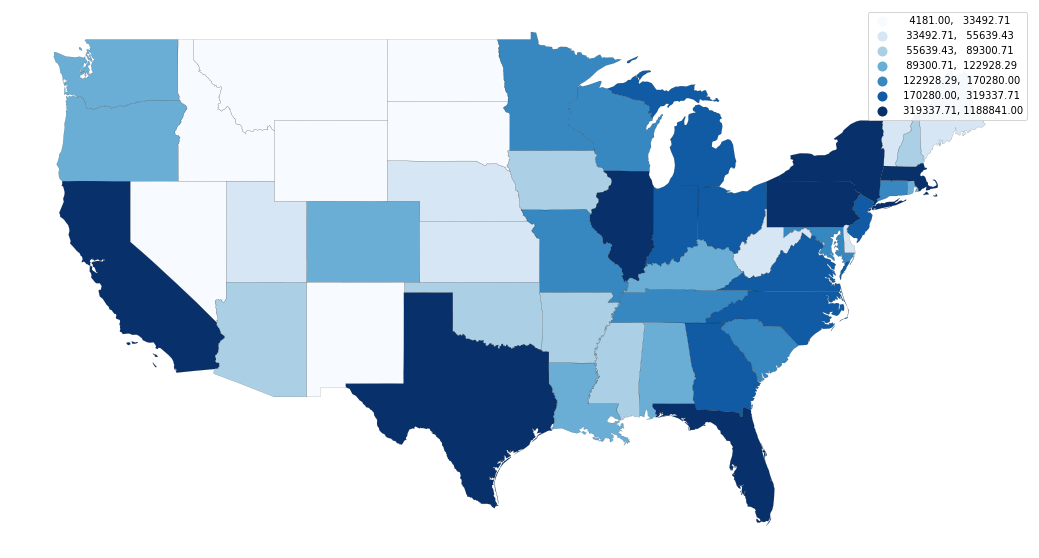

In [107]:
usa = gpd.read_file('./data/geo_export_8f3fb1c4-5152-4c1a-8235-36c95ef798bc.shp')

unis_data_states = unis_data.groupby(by='state_abbreviation').sum()['applicants_total'].reset_index()
unis_data_states.sort_values(by='applicants_total', ascending=False).head(5)

shape = pd.merge(
    left=usa,
    right=unis_data_states,
    left_on='state_name',
    right_on='state_abbreviation',
    how='left'
)

shape.dropna().head(5)
shape = shape[~shape['state_name'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

ax = shape.boundary.plot(edgecolor='black', linewidth=0.1, figsize=(20, 10))
shape.plot(ax=ax, column='applicants_total', legend=True, scheme='quantiles', k=7, cmap='Blues')
ax.set_axis_off()

print('''Chart 4. It clearly shows that unis of such states as California, Texas, Illinois, Florida, etc. get the most applications.''')

Furthermore, it is worth trying to find some correlations among features that can explain why some uni is more preferable or not that another one

From now on, it is better to split records by type of institution control as values can substantially differ between two groups (private and public unis)

Chart 5. Deriving from the acceptance rate, students' enrollment rates (or their ultimate decisions to enrol) 
vary and may not have any affect on enrollment decision


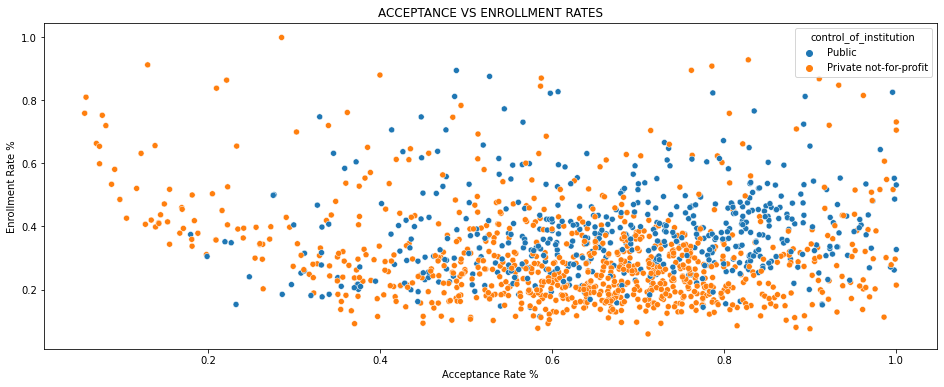

In [114]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x=unis_data.acceptance_rate, y=unis_data.enrollment_rate, hue=unis_data.control_of_institution)
plt.title('ACCEPTANCE VS ENROLLMENT RATES')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Acceptance Rate %')

print('''Chart 5. Deriving from the acceptance rate, students' enrollment rates (or their ultimate decisions to enrol) 
vary and may not have any affect on enrollment decision''')

Chart 6. Greater number of applications doesn't presuppose greater enrollment rate.


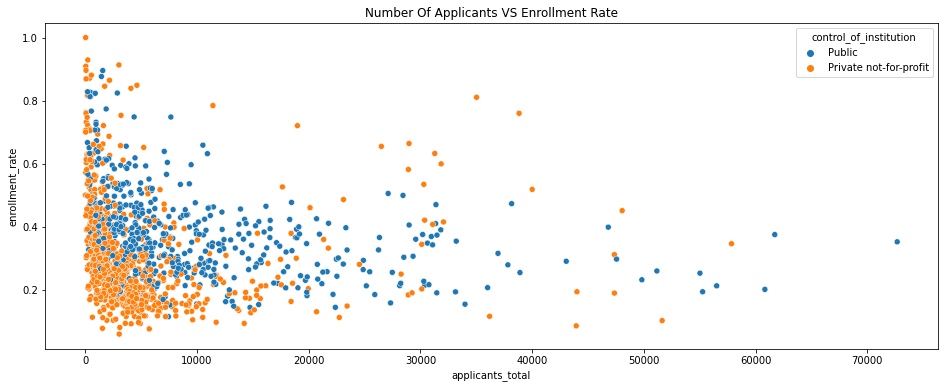

In [113]:
plt.figure(figsize=(16, 6))

sns.scatterplot(x=unis_data.applicants_total, y=unis_data.enrollment_rate, hue=unis_data.control_of_institution)
plt.title('Number Of Applicants VS Enrollment Rate')

print('''Chart 6. Greater number of applications doesn't presuppose greater enrollment rate.''')

Graph 7. Low tuition fees **usually** don't affect students' choice of applying to uni or not.


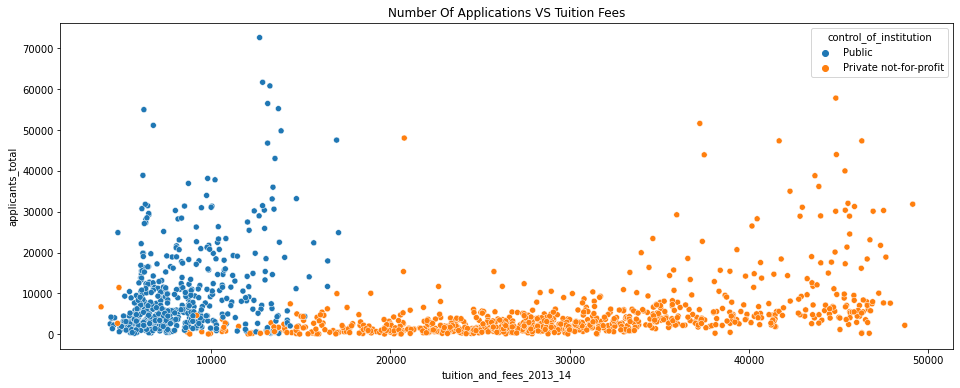

In [115]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x=unis_data.tuition_and_fees_2013_14, y=unis_data.applicants_total, hue=unis_data.control_of_institution)
plt.title('Number Of Applications VS Tuition Fees')

print('''Graph 7. Low tuition fees **usually** don't affect students' choice of applying to uni or not.''')

Graph 8. Low tuition fees encourage students to enrol


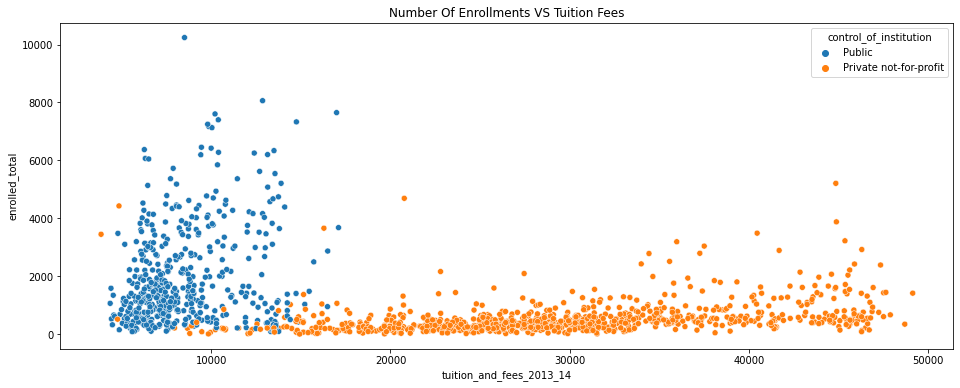

In [117]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x=unis_data.tuition_and_fees_2013_14, y=unis_data.enrolled_total, hue=unis_data.control_of_institution)
plt.title('Number Of Enrollments VS Tuition Fees')

print('''Graph 8. Low tuition fees encourage students to enrol''')

Graph 9. An average enrollment rate in public unis is greater than in private ones.


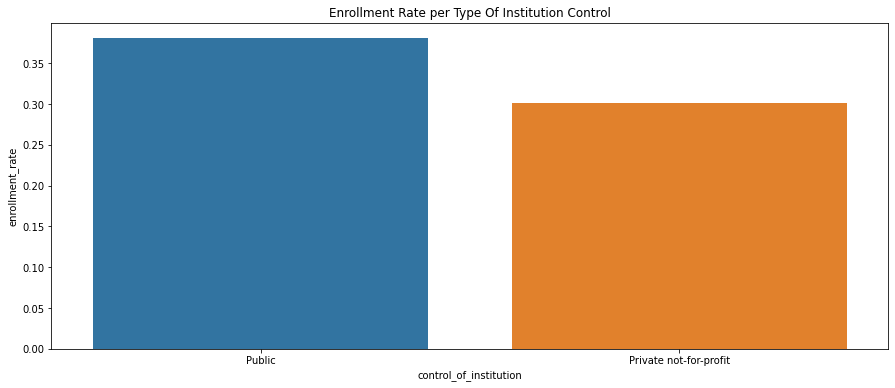

In [120]:
unis_data_grouped_control_of_institution = unis_data.groupby(by='control_of_institution')

unis_data_control_mean = unis_data_grouped_control_of_institution.agg('mean')['enrollment_rate'].reset_index().sort_index(ascending=False)
unis_data_control_mean

plt.figure(figsize=(15, 6))
sns.barplot(x=unis_data_control_mean.control_of_institution, y=unis_data_control_mean.enrollment_rate)
plt.title('Enrollment Rate per Type Of Institution Control')
 

print('''Graph 9. An average enrollment rate in public unis is greater than in private ones.''')

To summarize, the dataset has a decent potential to be explored further. Performed analysis helped us to understand that unis with great number of applicants don't frequently have great number of actual enrollments. We designate gographically where students are more likely to apply. Found out some interesting correlations and conclude that public unis are more preferable than private onse. 
The analysis can be extended with additional geo (e.g how close uni is), financial (tuition fees & costs of living), offered degrees and much more data.
Or be combined with dataset of students perspective where decision-making can be more distinctly tracked and analyzed.